# Lesson 30 - Logistic Regression

### The following topics are discussed in this notebook:
* Overview of logistic regression.
* Building logistic regression models in Scikit-Learn.

## Classification Tasks

Recall that in a classification task, we wish to create a model capable of generating predictions for the value of a categorical label (or response variable) $Y$. The model will use values of one or more features (or predictor variables) $X^{(1)}, X^{(2)}, ..., X^{(m)}$ as inputs. 

There are many different types of algorithms that you might consider applying for a given classification task. Some will work better on certain datasets than others. In this lesson, we will discuss the most basic type of classification algorithm, logistic regression. 

**Note:** Despite it's name, logistic regression is a **classification** algorithm, not a **regression** algorithm. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preliminary: The Sigmoid Function

Before explaining the details of logistic regression, we first need to introduce the sigmoid function. The **sigmoid** (or **logistic**) function is given by the following formula:

$\Large \sigma(z) = \frac{e^z}{1+e^z} = \frac{1}{1 + e^{-z}}$

A plot of the sigmoid function is shown below.

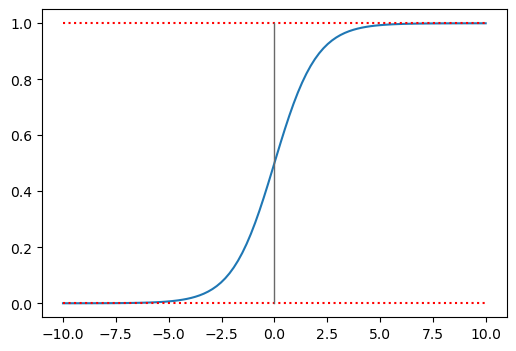

In [2]:
z = np.linspace(-10,10,100)
w = 1 / (1 + np.exp(-z))

plt.close()
plt.rcParams["figure.figsize"] = [6,4]
plt.plot(z,w)
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="r")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

One important property of the sigmoid function is that its output always lie between 0 and 1. As a result, the output of a sigmoid function can be interpreted as a probability.

## Logistic Regression

A **logistic regression** model is a probabilistic linear classification method that can be used to estimate the probability that an observation belongs to a particular class based on the feature values. Logistic regression can be adapted for use in multi-class classification problems, but we will begin by discussing the standard version of the algorithm, which is a binary classifier. 

## Binary Classification

Let $Y$ be a categorical variable that can assume one of two different values. We will encode these values as 0 and 1. These values are meant to represent two different categories or classes that observations can fall into. Assume that for each observation, we have not only a value for $Y$, but also values for one or more features $X^{(1)}, X^{(2)}, ..., X^{(m)}$. Suppose that the specific feature values for an observation have an impact on the likelihood of that observation belonging to one class or another. Given a set of observed feature values $x^{(1)}, x^{(2)}, ..., x^{(m)}$ for an observation, let `p` denote the probability that $Y=1$, and let `q` denote the probability that $Y=0$. Using probabilistic notation, we could write:

$$\large p = P \left[Y = 1 ~|~ X^{(1)} = x^{(1)}, X^{(2)} = x^{(2)}, ..., X^{(m)} = x^{(m)} \right]$$
$$\large q = P \left[Y = 0 ~|~ X^{(1)} = x^{(1)}, X^{(2)} = x^{(2)}, ..., X^{(m)} = x^{(m)} \right]$$


## The Logistic Regression Model 

The logistic regression model estimates the value of `p` using a formula of the following form: 

$$\large \hat{p} = \sigma\left(\hat{\beta}_0 + \hat{\beta}_1 X^{(1)} + \hat{\beta}_2 X^{(2)} + ... + \hat{\beta}_m X^{(m)}\right)$$

The function $\sigma$ in the expression above refers to the sigmoid function. The linear combination inside of the sigmoid could produce values that fall outside of the range $[0,1]$, but since we then apply the sigmoid to this result, we may interpret the results as a probability. Notice that the logistic regression model directly estimates only the probability $p$. However, if we have an estimate for $p$, then we can generate an estimate for $q$ using $\hat q = 1 - \hat p$.  

The  parameters $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_m$ are calculated by a learning algorithm to generate the model that provides the best fit for the given data, as was the case with linear regression. This is accomplished by minimizing the negative log-likelihood loss function on the data set. 

## Negative Log-Likelihood Loss

The **negative log-likelihood (NLL)** function is a common loss function used to score classification models. The NLL score is based on how likely it is for us to have seen observations of the sort observed, according to the model. 

Consider a binary classification problem with two classes: $Y=0$ and $Y=1$. Let $y_1, y_2, y_3, ..., y_n$ be the observed classes for several instances in a dataset. Let $\hat p_1, \hat p_2, ..., \hat p_n$ be probability estimates generated by a logistic regression model for each observation. Recall that these are estimates of the probability that $Y=1$, specifically. For each observation, let $\hat\pi_i$ be the model's estimate of the probability of the observation belonging to the class to which it was *actually* observed to be in. That is:

$$\hat\pi_i = \left\{\begin{array}{ll}\hat p_i & \text{if  } y_i = \text{1} \\
1 - \hat p_i & \text{if  } ~y_i = \text{0}
\end{array}\right.$$

We define the model's **likelihood** score on the dataset to be:

$$\large L = \hat\pi_1 \cdot \hat\pi_2 \cdot ... \cdot \hat\pi_n = \prod_{i=1}^{n} \hat\pi_i$$

And we define the model's **negative log-likelihood** score on the dataset to be: 

$$\large NLL = -\ln(L) = -\sum_{i=1}^n \ln(\hat\pi_i)$$

The logistic regression learning algorithm will select the parameter values $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_m$ that will result in the smallest value for negative log-likelihood. This is equivalent to selecting the parameter values that would produce the highest likelihood score. In practice, we use NLL rather than likelihood because NLL is more convenient to work with, both computationally and mathematically. 

## Logistic Regression in Scikit-Learn

Logistic regression models are created in Scikit-Learn as instances of the `LogisticRegression` class, which is found in the `sklearn.linear_model` module. We will import that now, along with some other Scikit-Learn tools that we will need in this lesson.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

## Example: Exam Preparation

Assume that students in a certain field have to take a professional exam. We wish to determine the effect that time spent studying has on a students chance of passing the exam. We collect a dataset consisting of 200 students. For each student, we have the following pieces of information:

* `study_hrs` - The number of hours the student spent studying alone. 

* `seminar_hrs` - The number of hours the student spent in an exam preparation seminar. 

* `passed` - The results of the test. The result is recorded as '0' if the student failed and '1' if the student passed. 

We now read the data into a DataFrame, and view the first 5 rows.


In [4]:
df = pd.read_csv('data/exam_prep.txt', sep='\t')
df.head()

,study_hrs,seminar_hrs,passed
0,111,6,1
1,82,12,1
2,83,5,0
3,76,18,0
4,101,1,0


We extract the feature array `X` and the label array `y` from the DataFrame.

In [5]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values

In hte figure below, we display a scatter plot of our dataset, using the two feature values as the coordinates for points in our plot. We fill each point according to the results of the exam for the student represented by that point. 

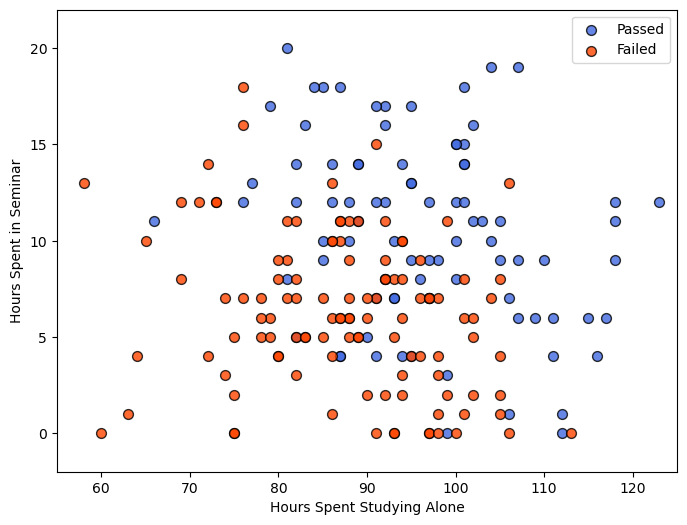

In [6]:
plt.figure(figsize=[8,6])
plt.scatter(X[y==1,0], X[y==1,1], s=50, alpha=0.8,
            c='royalblue', edgecolors='k', label='Passed')
plt.scatter(X[y==0,0], X[y==0,1], s=50, alpha=0.8,
            c='orangered', edgecolors='k', label='Failed')

plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')

plt.xlim([55,125])
plt.ylim([-2,22])
plt.legend()
plt.show()

We will split the dataset into training and test sets, using an 70/30 split. We will not create a validation set in this instance, as we will not be comparing different models in this example. 

In [7]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In the figure below, we display scatter plots for the training and test sets separately. 

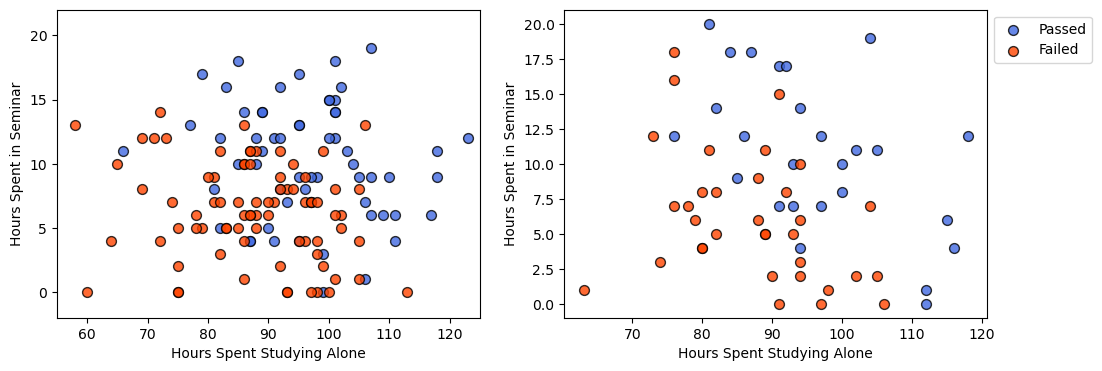

In [8]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sel = y_train == 1
plt.scatter(X_train[sel,0], X_train[sel,1], s=50, alpha=0.8,
            c='royalblue', edgecolors='k', label='Passed')
plt.scatter(X_train[~sel,0], X_train[~sel,1], s=50, alpha=0.8,
            c='orangered', edgecolors='k', label='Failed')
plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')
plt.xlim([55,125])
plt.ylim([-2,22])

plt.subplot(1,2,2)
sel = y_test == 1
plt.scatter(X_test[sel,0], X_test[sel,1], s=50, alpha=0.8,
            c='royalblue', edgecolors='k', label='Passed')
plt.scatter(X_test[~sel,0], X_test[~sel,1], s=50, alpha=0.8,
            c='orangered', edgecolors='k', label='Failed')
plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

We will now use the `LogisticRegression` class from Scikit-Learn to create the classification model. As was the case with linear regression, the trained model object will contain two attributes `intercept_` and `coef_` that will contain the values of the parameters $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_m$ for the optimal model selected by the training algorithm. 

In [10]:
model_1 = LogisticRegression(solver='lbfgs', penalty=None)
model_1.fit(X_train, y_train)

print('Intercept:   ',  model_1.intercept_)
print('Coefficients:', model_1.coef_)

Intercept:    [-11.59076997]
Coefficients: [[0.0971881  0.28798022]]


The formula of our optimal logistic regression model is:

$$\Large \hat p = \sigma \left(-11.5908 ~+~ 0.0972 \cdot \textrm{studyhrs} ~+~ 0.2880 \cdot \textrm{seminarhrs}\right)$$

This can also be written in the following form:

$$\Large\hat p = \frac {1} {1 + e^{11.5908 ~-~ 0.0972 \cdot \textrm{studyhrs} ~-~ 0.2880 \cdot \textrm{seminarhrs}}}$$

The decision boundary for this model is displayed below. 


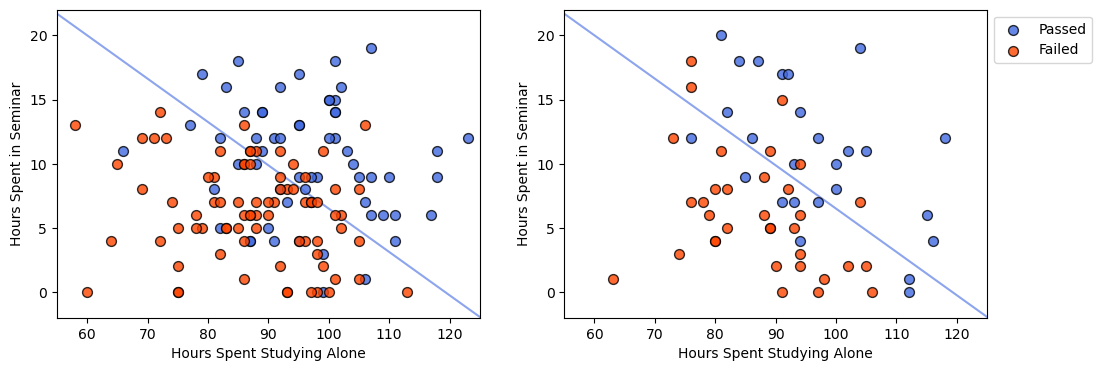

In [21]:
b = -model_1.intercept_ / model_1.coef_[0,1]
m = -model_1.coef_[0,0] / model_1.coef_[0,1]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sel = y_train == 1
plt.scatter(X_train[sel,0], X_train[sel,1], s=50, alpha=0.8,
            c='royalblue', edgecolors='k', label='Passed', zorder=3)
plt.scatter(X_train[~sel,0], X_train[~sel,1], s=50, alpha=0.8,
            c='orangered', edgecolors='k', label='Failed', zorder=3)

# plt.fill([0,200,200,0],[-10,-10,b + m*200, b],'orangered',alpha=0.2, zorder=1)
# plt.fill([0,200,200,0],[30,30,b + m*200, b],'royalblue',alpha=0.2, zorder=1)
plt.plot([0,200],[b, b + 200*m], c='royalblue', alpha=0.6, zorder=2)

plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')
plt.xlim([55,125])
plt.ylim([-2,22])

plt.subplot(1,2,2)
sel = y_test == 1
plt.scatter(X_test[sel,0], X_test[sel,1], s=50, alpha=0.8,
            c='royalblue', edgecolors='k', label='Passed', zorder=3)
plt.scatter(X_test[~sel,0], X_test[~sel,1], s=50, alpha=0.8,
            c='orangered', edgecolors='k', label='Failed', zorder=3)

# plt.fill([0,200,200,0],[-10,-10,b + m*200, b],'orangered',alpha=0.2, zorder=1)
# plt.fill([0,200,200,0],[30,30,b + m*200, b],'royalblue',alpha=0.2, zorder=1)
plt.plot([0,200],[b, b + 200*m], c='royalblue', alpha=0.6, zorder=2)

plt.xlabel('Hours Spent Studying Alone')
plt.ylabel('Hours Spent in Seminar')
plt.xlim([55,125])
plt.ylim([-2,22])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

We now use the model's `score()` method to calculate its accuracy on the training and test sets.

In [22]:
train_acc = model_1.score(X_train, y_train)
test_acc = model_1.score(X_test, y_test)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.7857
Testing Accuracy:  0.7667


Suppose that we want to estimate the chances of passing for three students who have prepared as follows:

1. `study_hrs = 70` and `seminar_hrs = 16`
2. `study_hrs = 100` and `seminar_hrs = 10`
3. `study_hrs = 120` and `seminar_hrs = 5`

We can use the `predict()` method to generate a prediction as to whether or not each of these students will pass the exam. 

In [23]:
X_new = [[70,16],[100,10],[120,5]]
print(model_1.predict(X_new))

[0 1 1]


We can use the `predict_proba()` method to estimate the probability of success for each of these students. 

In [24]:
print(model_1.predict_proba(X_new))

[[0.54485887 0.45514113]
 [0.26740229 0.73259771]
 [0.18068648 0.81931352]]


## Example: Pima Diabetes Dataset

For this example, we will be working with the Pima Diabetes Dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. All patients are females at least 21 years old of Pima Indian heritage. 

The columns in this dataset are described below. 

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)

Our goal will be to predict the value of `Outcome` using the other variables in the dataset as features.

We start by importing the dataset and view the first 10 rows. 

In [25]:
pima = pd.read_csv('data/diabetes.csv', sep=',')
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Let's check the dimensions of the DataFrame.

In [26]:
print(pima.shape)

(768, 9)


We will extract the feature and label arrays from the DataFrame.

In [27]:
X = pima.iloc[:,:-1].values
y = pima.iloc[:,-1].values

Before creating a model, let's calculate the proportion of observations in the dataset that are actually diabetic. 

In [28]:
print(np.mean(y == 1))

0.3489583333333333


We note that roughly 35% of individuals represented in the dataset are in fact diabetic. 

We now split the data into training and test sets, using a 70/30 split.

In [29]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

We will now create use Scikit-Learn to create our logistic regression classifier. We will then print the parameters for our optimal model. 

In [31]:
model_2 = LogisticRegression(solver='lbfgs', penalty=None, max_iter=2000)
model_2.fit(X_train, y_train)

np.set_printoptions(suppress=True)
print('Intercept:   ',  model_2.intercept_)
print('Coefficients:', model_2.coef_)

Intercept:    [-8.46764389]
Coefficients: [[ 0.15019261  0.0332833  -0.01633703 -0.00139453  0.00009955  0.09493175
   1.06169563  0.01660563]]


We now use the model's `score()` method to calculate its accuracy on the training and test sets.

In [32]:
train_acc = model_2.score(X_train, y_train)
test_acc = model_2.score(X_test, y_test)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.7858
Testing Accuracy:  0.7706


Let's use our model to generate predictions for each of the first three observations in our test set. The feature values for these observations are displayed below.

In [33]:
pd.DataFrame(X_test[:3,:], columns=pima.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,131.0,66.0,40.0,0.0,34.3,0.196,22.0
1,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
2,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0


We will use the `predict()` method to predict the value of `Outcome` for each of these observations. We display the predictions, along with the observed values of `Outcome`. 

In [34]:
print('Predicted Labels:', model_2.predict(X_test[:3,]))
print('Observed Labels: ', y_test[:3])

Predicted Labels: [0 1 0]
Observed Labels:  [1 0 0]


We will now use `predict_proba` to generate probability estimates for each of the three observations.

In [35]:
print(model_2.predict_proba(X_test[:3,]))

[[0.80407842 0.19592158]
 [0.20170967 0.79829033]
 [0.68575951 0.31424049]]


We close this example by displaying the confuction matrix and classification report for our model, as calculated on the test set. 

In [36]:
pred_test = model_2.predict(X_test)
cm = confusion_matrix(y_test, pred_test)
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,133,17
1,36,45


In [37]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



This report suggests the following:

* When the model classifies someone as non-diabetic, it will be correct roughly 79% of the time. 
* When the model classifies someone as diabetic, it will be correct roughly 73% of the time. 
* The model will correctly classify 83% of non-diabetic individuals. 
* The model will correctly classify 56% of diabetic individuals. 

## Multiclass Classification with Logistic Regression

Assume that we wish to create a classification model for use in a task in which there are 3 or more classes. In particular, assume that there are `m` predictors and that our labels each fall into one of `K` classes, where `K` is greater than 2. In this case, the standard version of logistic regression will not work, as it can only perform binary classification. There are, however, multiple ways of adapting logistic regression to perfom multiclass classification. We will present one such method here. 

In **multinomial logistic regression**, we generate a probability distribution  $\large\hat p^{(1)},\hat p^{(2)}, ...,\hat p^{(K)}$ over the set of $K$ possible class labels. To generate these probability estimates, we use a model of the following form:

* For each $k = 1, 2, ..., K$, let $\large z^{(k)} = \hat\beta_{k,0} + \hat\beta_{k,1} \cdot x^{(1)} + \hat\beta_{k,2} \cdot x^{(2)} + ... +  \hat\beta_{k,M} \cdot x^{(M)}$ 


* For each class, define $\Large\hat p^{(k)} = \frac{e^{z^{(k)}}}{ \sum_{j=1}^K e^{z^{(j)}} }$


As with binomial logistic regression, the parameters $\hat\beta_{k,j}$ are selected by a learning algorithm to generate the model with the lowest negative log-likelihood score. 


## Example 3: Sythentic Dataset with Four Classes

We will explore multinomial logistic regression using a synthetic dataset. We will generate the data for this example in the next cell.

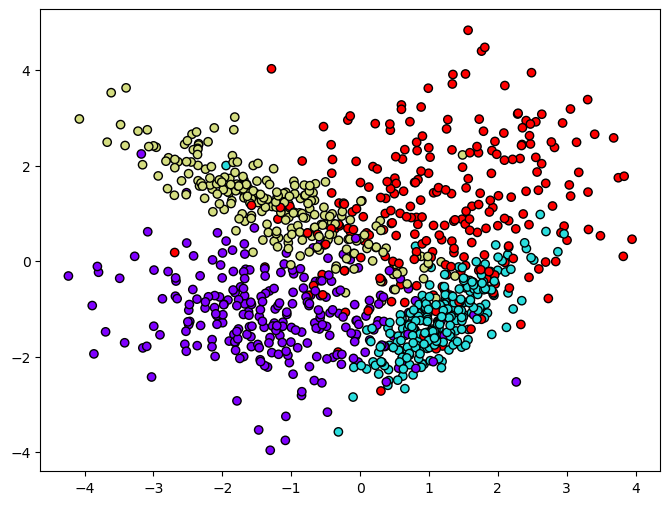

In [38]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=4, n_clusters_per_class=1,
                           class_sep=1.2, random_state=1)

plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow')
plt.show()

We will split the data into training and test sets using an 80/20 split.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print('X_train Shape:', X_train.shape)
print('X_test Shape: ', X_test.shape)

X_train Shape: (800, 2)
X_test Shape:  (200, 2)


In the cell below, we will create our multinomial logistic regression model. We indicate that we are performing multinomial regression by setting `multi_class='multinomial'`. We will also calculate the training and test accuracy for our model.

In [41]:
model_3 = LogisticRegression(solver='lbfgs', penalty=None, multi_class='multinomial')
model_3.fit(X_train, y_train)

print('Training Accuracy:  ', model_3.score(X_train, y_train))
print('Validation Accuracy:', model_3.score(X_test, y_test))

Training Accuracy:   0.82125
Validation Accuracy: 0.83


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


We plot the decision boundaries for our model in the figure below.

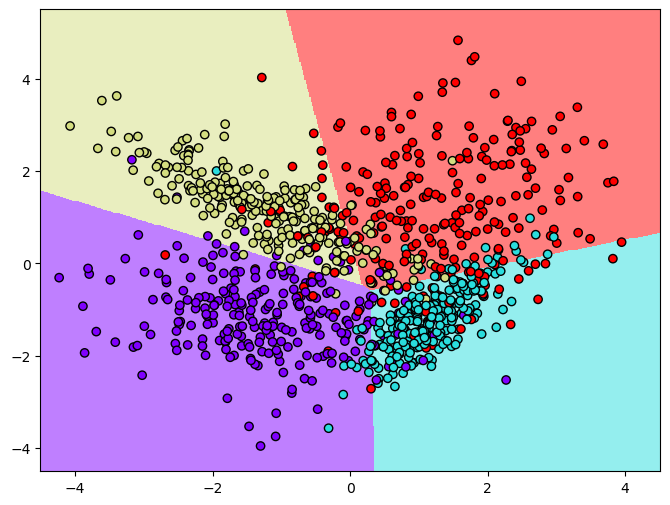

In [42]:
n, x0, x1, y0, y1 = 500, -4.5, 4.5, -4.5, 5.5
xticks = np.linspace(x0, x1, n)
yticks = np.linspace(y0, y1, n)
grid_pts = np.transpose([np.tile(xticks,n), np.repeat(yticks,n)])
class_grid = model_3.predict(grid_pts).reshape(n,n)
plt.figure(figsize=[8,6])
plt.pcolormesh(xticks, yticks, class_grid, cmap='rainbow', zorder=1, vmin=0, vmax=3)
plt.fill([x0,x0,x1,x1], [y0,y1,y1,y0], 'white', alpha=0.5, zorder = 2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap='rainbow', zorder=3)
plt.show()

The cell below display the confusion matrix for our model, as calculated on the test set. 

In [43]:
test_pred = model_3.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm)
cm_df

,0,1,2,3
0,45,1,3,1
1,4,43,0,2
2,0,2,42,6
3,2,9,4,36


Finally, we display the classification report for our test set. 

In [44]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.78      0.88      0.83        49
           2       0.86      0.84      0.85        50
           3       0.80      0.71      0.75        51

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

